# Identification of Macrophage Micro-Environments

In this chapter, we investigate transcriptional profiles within macrophage spots, identifying micro-environments where these crucial immune cells reside. This approach sets the stage for a deeper understanding of the interplay between gene expression, cell types, and vaping-related effects on lung tissues. We identify key cell types associated with macrophage spots, specific macrophage micro-environments, and biological functions associated with these micro-environments.

## Clustering Analysis

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [2]:
import scanpy as sc
import anndata as ad
import scvi

In [3]:
# Custom Plotting functions
import plot_st
import importlib
importlib.reload(plot_st)

<module 'plot_st' from '/Users/anhnguyen/Documents/My_Projects/ST_Data_Analysis/plot_st.py'>

In [4]:
root_dir = '/Users/anhnguyen/Documents/My_Projects/ST_Data_Analysis/'
adata_all = ad.read_h5ad(root_dir + 'results/adata_all.h5ad')

In [8]:
def clustering_DE (adata):
    scvi.model.SCVI.setup_anndata(adata, layer = 'counts',
                                  continuous_covariate_keys=['pct_counts_mt', 'total_counts'])
    model_ = scvi.model.SCVI(adata)
    # If GPU is available, consider using accelerator='gpu' for train()
    model_.train()
    model_.save(root_dir + '/results/adata_all_model')

    adata.obsm['X_scVI'] = model_.get_latent_representation()
    adata.layers['scvi_normalized'] = model_.get_normalized_expression(library_size = 1e4)

    sc.pp.neighbors(adata, n_neighbors=30, use_rep='X_scVI')
    sc.tl.leiden(adata, key_added='clusters', resolution=0.5)
    sc.tl.umap(adata)

    adata.uns['cluster_markers'] = model_.differential_expression(groupby='clusters')

In [29]:
clustering_DE(adata_all)

GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/anhnguyen/miniconda3/envs/st_project/lib/python3.12/site-packages/lightning/pytorch/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
/Users/anhnguyen/miniconda3/envs/st_project/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.
/Users/anhnguyen/miniconda3/envs/st_project/lib/python3.12/site-packages/lightning/pytorch/loops/fit_loop.py:293: The number of training batches (9) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch 400/400: 100%|██████████| 400/400 [05:11<00:00,  1.26it/s, v_num=1, train_loss_step=9.75e+3, train_loss_epoch=1.01e+4]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 1/400:   0%|          | 0/400 [33:26<?, ?it/s]


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/var/folders/_q/96f_9fwn49v57ybhtdv9075c0000gn/T/ipykernel_4970/3014161493.py:13: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, key_added='clusters', resolution=0.5)


DE...: 100%|██████████| 8/8 [00:25<00:00,  3.20s/it]


In [14]:
# adata_all.write_h5ad(root_dir + 'results/adata_all.h5ad')
adata_all = ad.read_h5ad(root_dir + 'results/adata_all_UW.h5ad')
adata_all

AnnData object with n_obs × n_vars = 1249 × 16448
    obs: 'lung', 'sex', 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'clusters', '_scvi_raw_norm_scaling', 'rel_cell_type'
    var: 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'cluster_markers', 'extent_F31', 'extent_F62', 'extent_M24', 'extent_M63', 'hvg', 'leiden', 'log1p', 'lung_image_F31', 'lung_image_F62', 'lung_image_M24', 'lung_image_M63', 'neighbors', 'umap'
    obsm: 'X_scVI', 'X_umap', '_scvi_extra_continuous_covs', 'spatial'
    layers: 'counts', 'scvi_normalized'
    obsp: 'connectivities', 'distances'

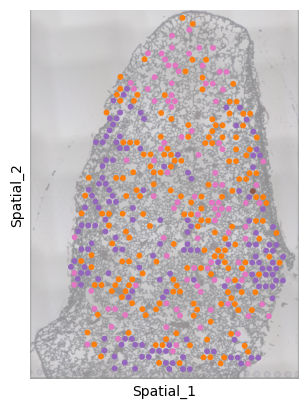

In [24]:
plot_st.plt_spatial_cluster(adata_all, 'M24', '0_Per_1_M24')

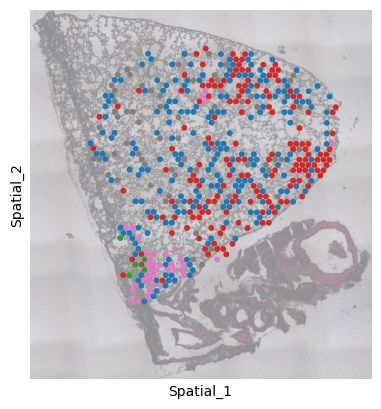

In [26]:
plot_st.plt_spatial_cluster(adata_all, 'F31', '0_Per_2_F31')

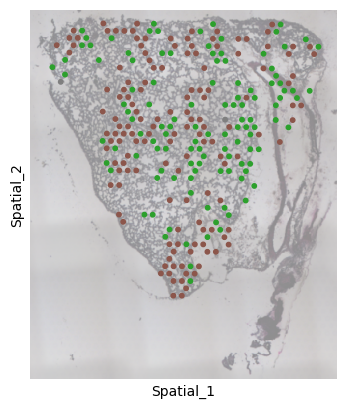

In [27]:
plot_st.plt_spatial_cluster(adata_all, 'M63', 'CTL_1_M63')

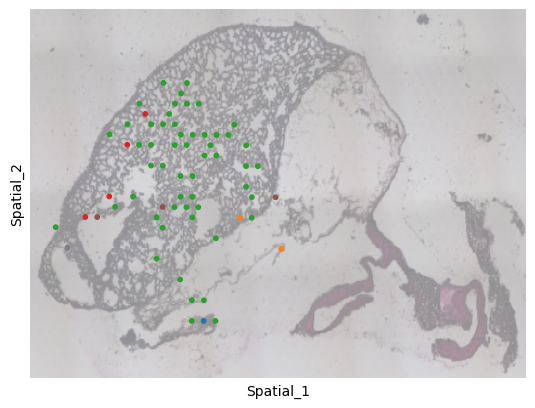

In [28]:
plot_st.plt_spatial_cluster(adata_all, 'F62', 'CTL_2_F62')

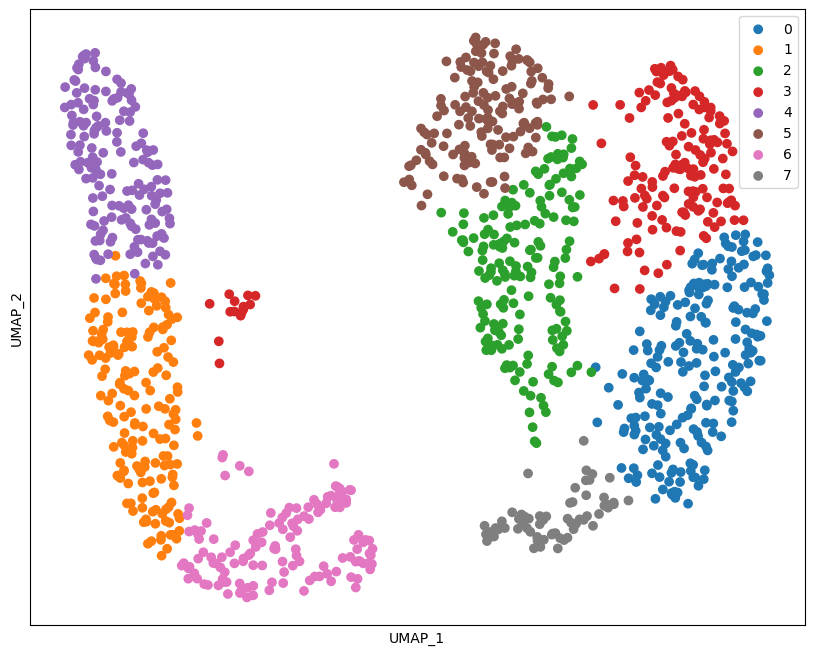

In [94]:
plot_st.plt_umap_cluster(adata_all)

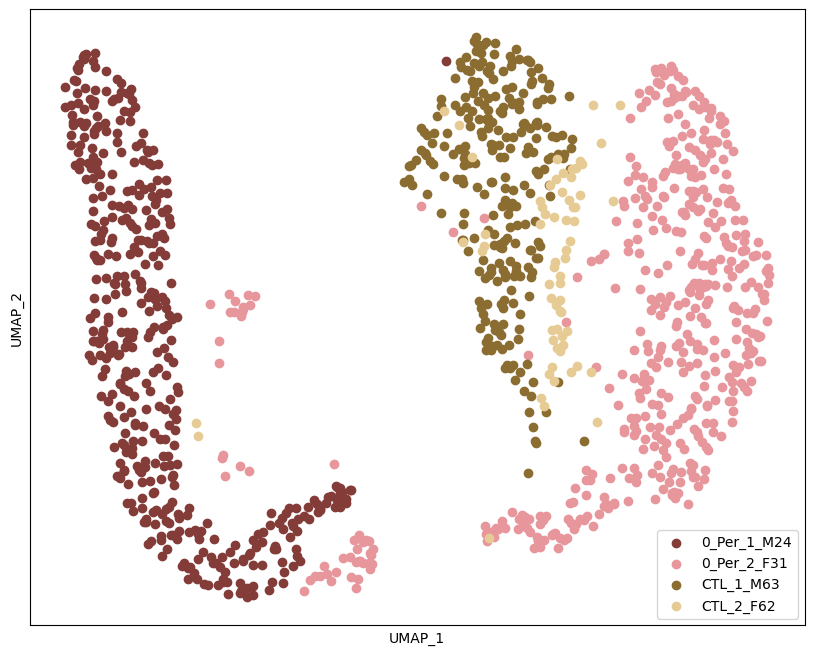

In [96]:
plot_st.plt_umap_sample(adata_all)

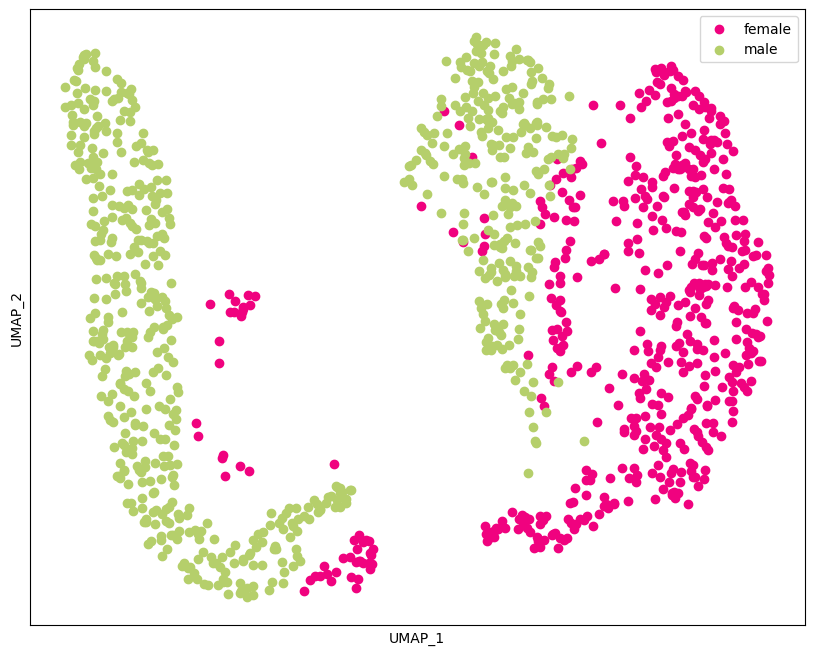

In [100]:
plot_st.plt_umap_sex(adata_all)

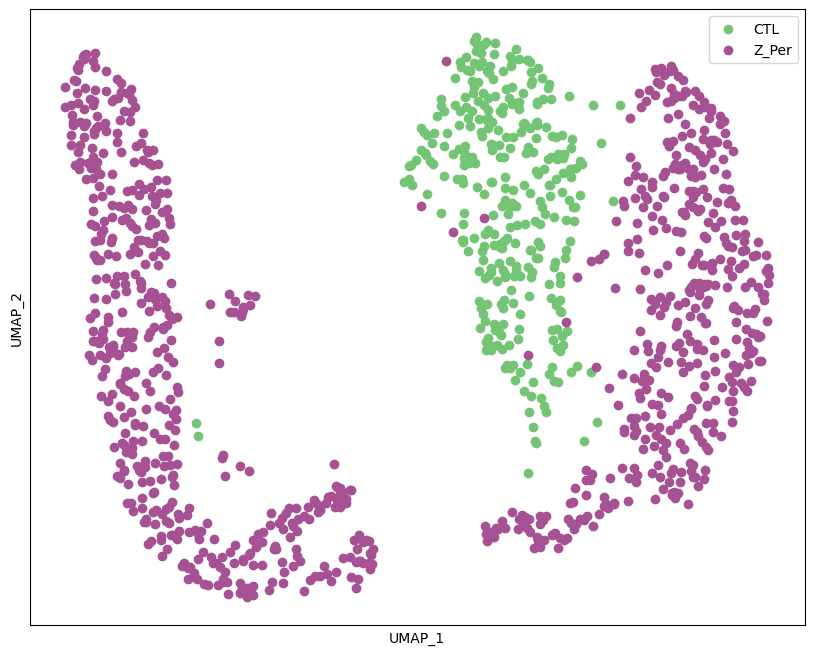

In [101]:
plot_st.plt_umap_condition(adata_all)

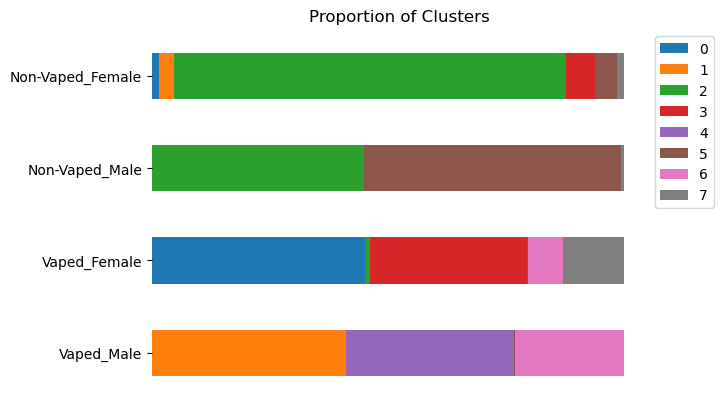

In [103]:
plot_st.plt_proportion(adata_all)

## Differential Expression Analysis

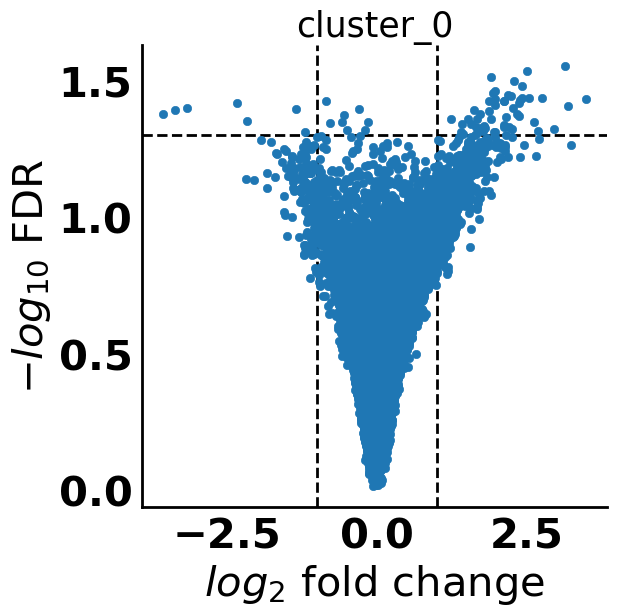

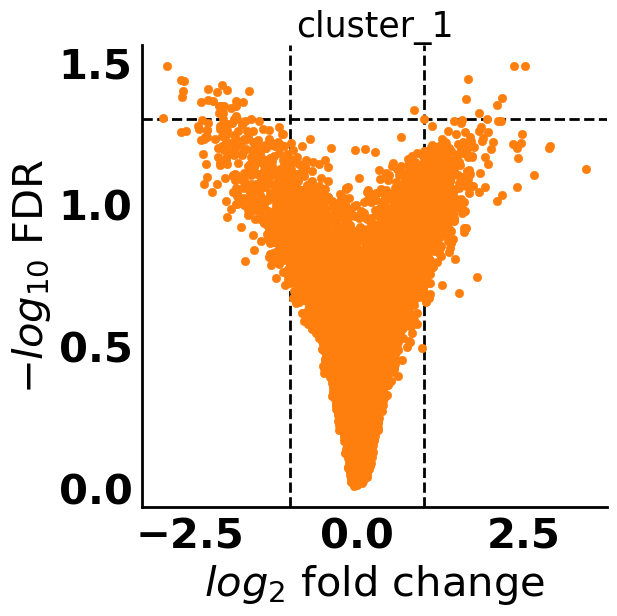

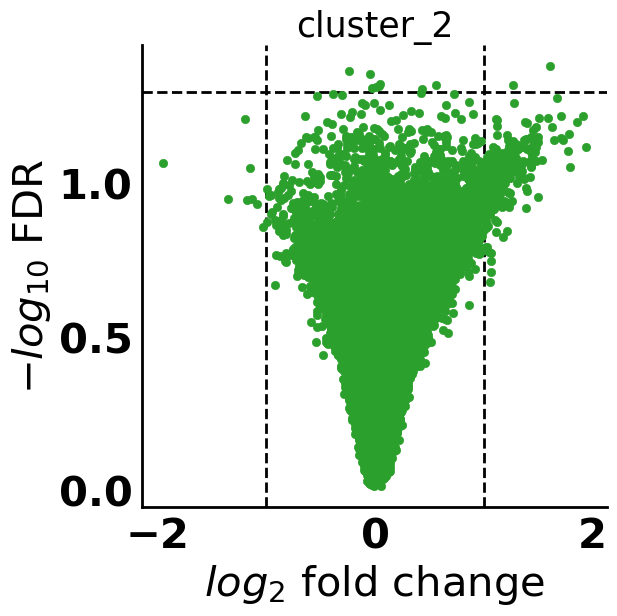

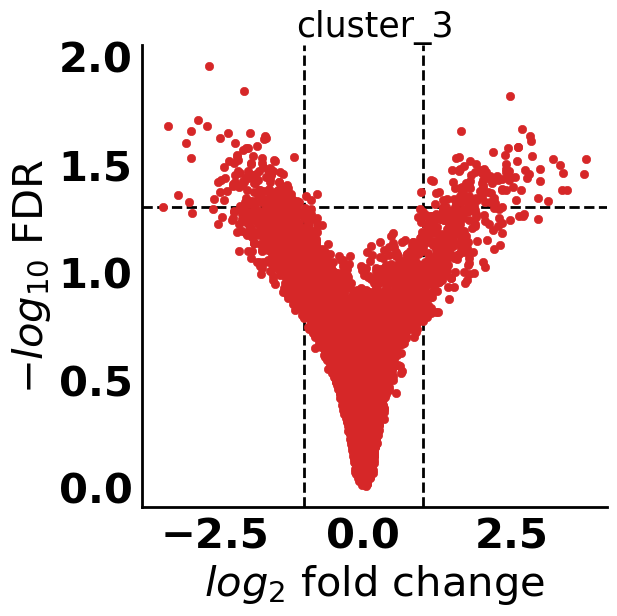

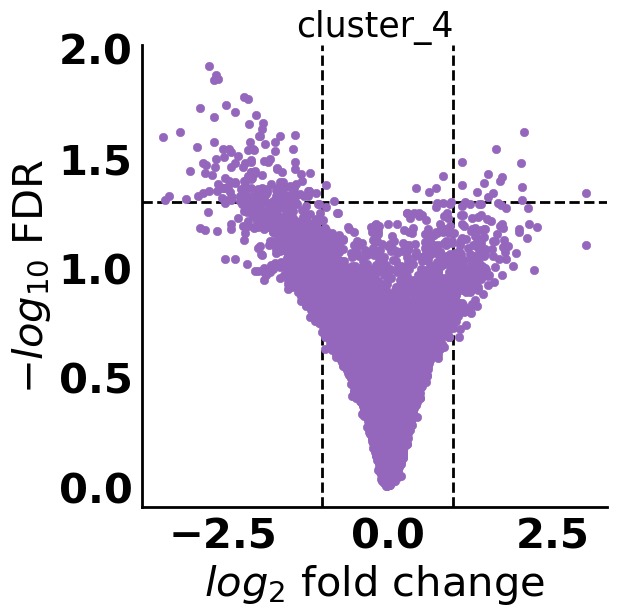

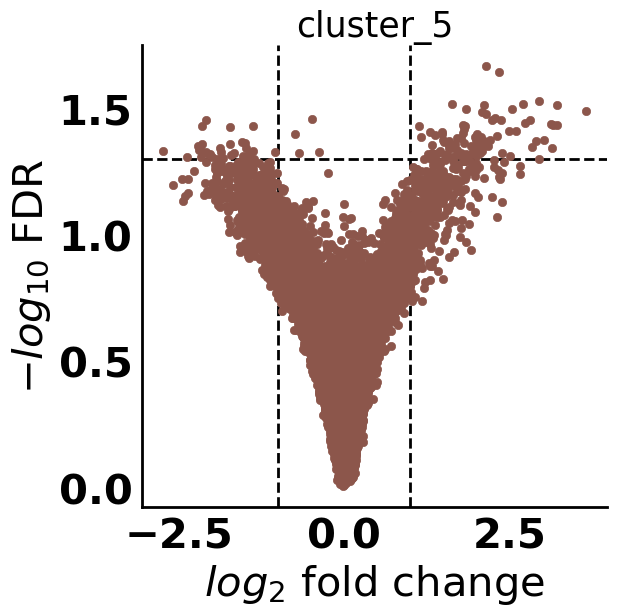

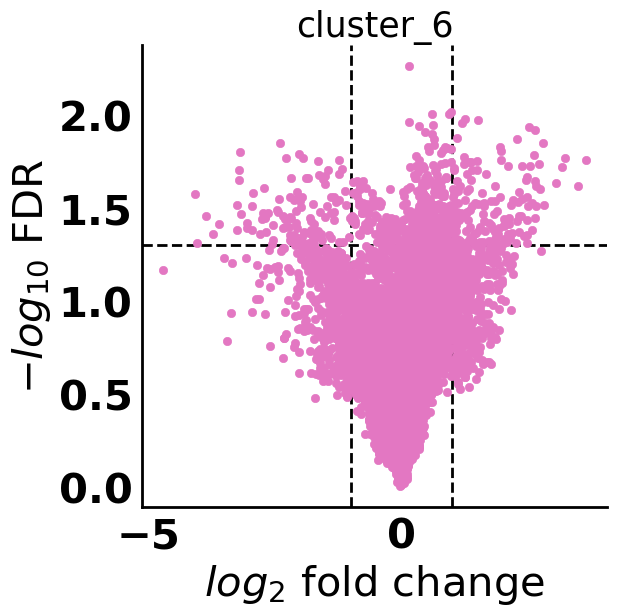

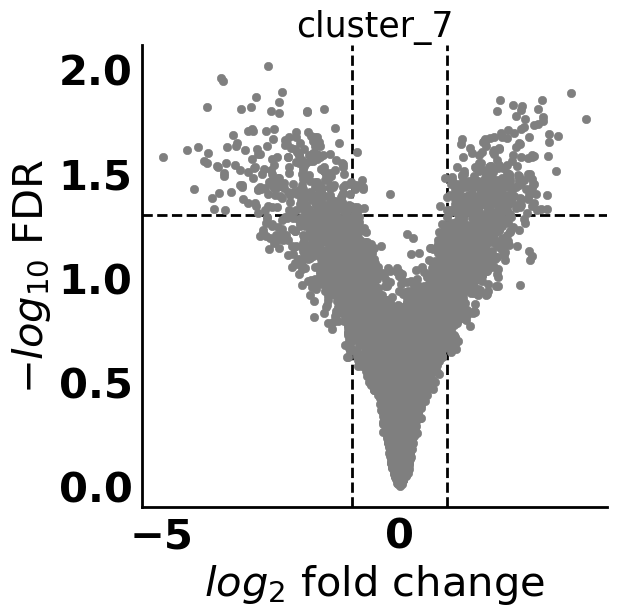

In [89]:
plot_st.plt_volcano_clt(adata_all)

Text(50.722222222222214, 0.5, 'cluster')

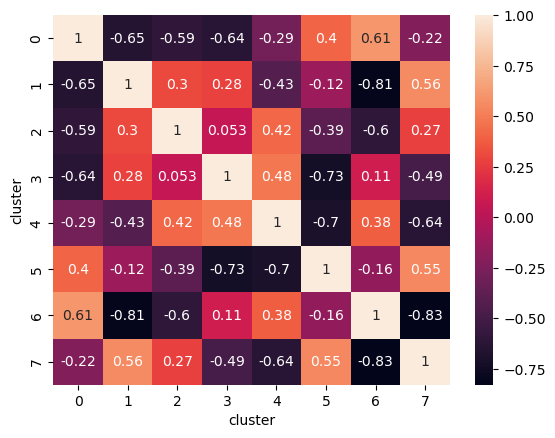

In [12]:
data = adata_all.uns['cluster_markers'].copy()
cats = adata_all.obs['clusters'].cat.categories
out_raw = pd.DataFrame(index=cats)

de_sort_df = pd.DataFrame(index=adata_all.var_names)
for i, c in enumerate(cats):
    data_cluster = data.loc[data['group1'] == c]
    lfc_data_cluster = data_cluster['lfc_mean'].astype(float)
    de_sort_df = pd.concat([de_sort_df, lfc_data_cluster], axis=1)
    de_sort_df.rename(columns={de_sort_df.columns[i]: c}, inplace=True)

for i, c1 in enumerate(cats):
    data_cluster1 = de_sort_df[c1]
    out = []
    for j, c2 in enumerate(cats):
        data_cluster2 = de_sort_df[c2]
        res = stats.pearsonr(data_cluster1, data_cluster2)
        out.append(res[0])
    out_raw[c1] = out

plt.figure()
sns.heatmap(out_raw, annot=True)
plt.xlabel('cluster')
plt.ylabel('cluster')
